# Random number generation (2)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define considered distribution

In [2]:
# Defined distribution needs not to be properly normalised
# But maximum value should be know or at least constrained from above

# Maximum value and range for the considered distribution

Ymax = 2./(4-np.pi)

Xmin = -1.
Xmax = +1.

def mypdf(x):
    norm = 2./(4-np.pi)
    val = 1 - np.sqrt(1 - (1-np.abs(x))**2)
    return val*norm


### (2) Generate a set of random variables from given distribution

In [7]:
# Number of generations

Nmc = 1000

# Generate uniform distribution

v_tab = np.random.uniform(Xmin,Xmax, size=Nmc)

# von Neumann Acceptance–Rejection Technique

r_tab = np.random.uniform(size=Nmc)

w_tab = Ymax*r_tab < mypdf(v_tab)



### (3) Plot results

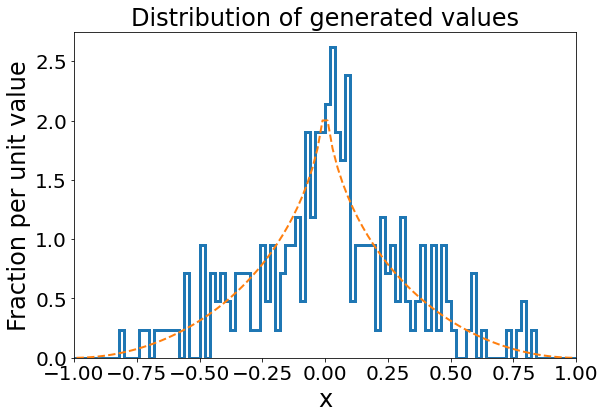

In [8]:
# Number of bins in the histogram

Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(v_tab[w_tab],bins=Nbin, range=[Xmin,Xmax], density=True, log=False, histtype='step',linewidth=3)

plt.xlabel('x',size=24)
plt.ylabel('Fraction per unit value',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Distribution of generated values",size=24)
plt.xlim([-Xmax,Xmax])

# Expected dependence

dX = (Xmax-Xmin)/Nbin
x_tab = np.linspace(Xmin+dX/2,Xmax-dX/2,Nbin)   # Use points in the middle of the bin
y_tab = mypdf(x_tab)
plt.plot(x_tab,y_tab,'--',linewidth=2)

fname = '04_generate2_'+str(Nmc)+'.png'
plt.savefig(fname)

plt.show()

In [9]:
print('Generation efficiency: ',np.sum(w_tab)/Nmc)

Generation efficiency:  0.21


In [10]:
print('Expected efficiency: ',1.-np.pi/4.)

Expected efficiency:  0.21460183660255172
